In [3]:
%reload_ext autoreload
%autoreload 2

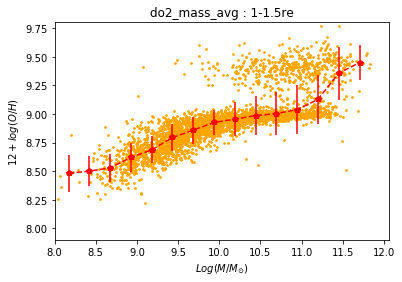

there isnot a group


<Figure size 432x288 with 0 Axes>

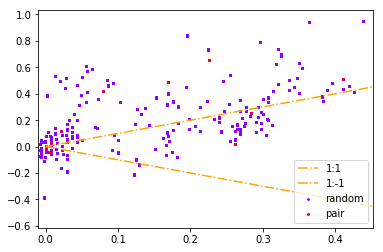

<Figure size 432x288 with 0 Axes>

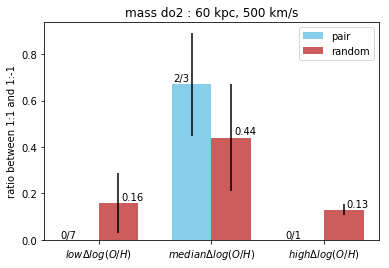

<Figure size 432x288 with 0 Axes>

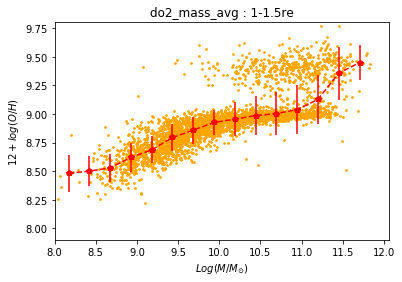

there isnot a group


<Figure size 432x288 with 0 Axes>

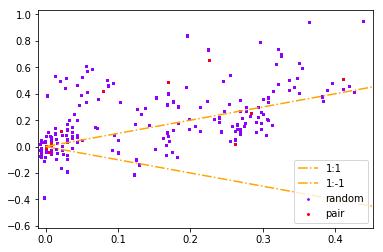

<Figure size 432x288 with 0 Axes>

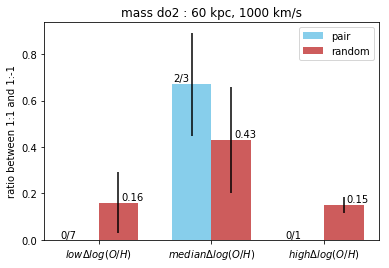

<Figure size 432x288 with 0 Axes>

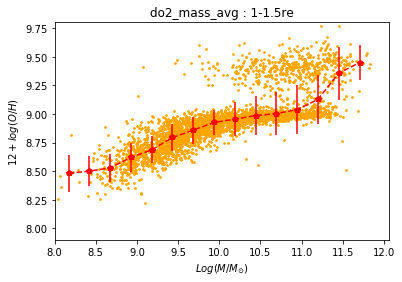

there is a group ['8942-6103' '9193-12702']


<Figure size 432x288 with 0 Axes>

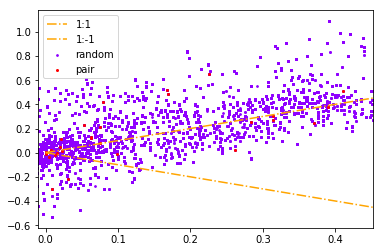

<Figure size 432x288 with 0 Axes>

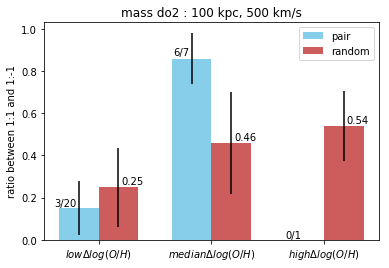

<Figure size 432x288 with 0 Axes>

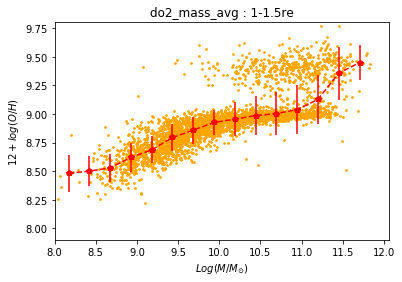

there is a group ['8942-6103' '9193-12702']


<Figure size 432x288 with 0 Axes>

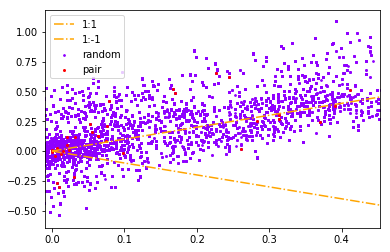

<Figure size 432x288 with 0 Axes>

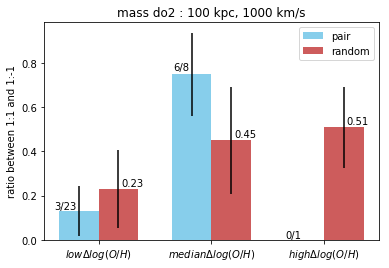

<Figure size 432x288 with 0 Axes>

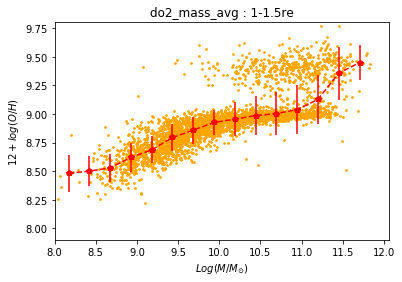

there is a group ['8082-6101' '8942-6103' '9193-12702' '9871-1901']


<Figure size 432x288 with 0 Axes>

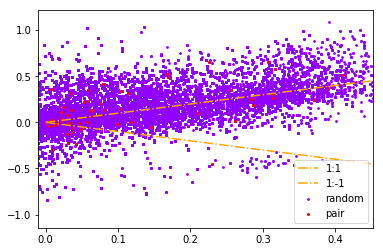

<Figure size 432x288 with 0 Axes>

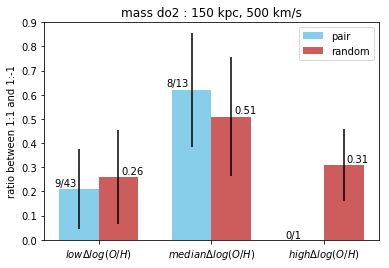

<Figure size 432x288 with 0 Axes>

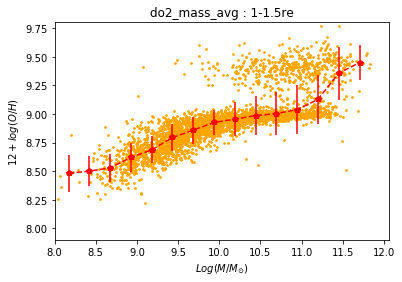

there is a group ['8078-3703' '8082-6101' '8942-6103' '9193-12702' '9871-1901']


<Figure size 432x288 with 0 Axes>

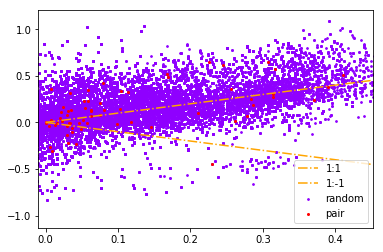

<Figure size 432x288 with 0 Axes>

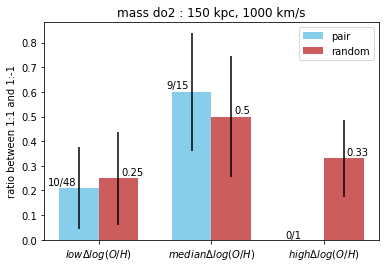

<Figure size 432x288 with 0 Axes>

In [9]:


from astropy.io import fits

import mzv1

# =======
dir_mz = '/Users/astro/Documents/notebooks/zs/2019-10-18/1.0re_1/res1/'
pair = '/Users/astro/Documents/notebooks/zs/2019-09-17/pair/'
dir1 = dir_mz+'test/'
# =======


def m_z(plot, save, errorbar, dis, dvel, indicator_name):

    f = fits.open(dir_mz + 'z_%s_10_25.fits' % (indicator_name))
    data = f[1].data
    plateifu = data['plateifu']
    z_e = data['z_%s_e' % indicator_name]
    z = data['z_%s' % indicator_name]
    mass = data['mass_avg']
    

    p = mzv1.mzr(plateifu,
               z,
               z_e,
               indicator_name,
               mass,
               'mass_avg',
               dis,
               dvel,
               '19-09-29-22-46',
               dir1,
               pair,
               plot=plot,
               save=save,
               errorbar=errorbar)
    return

if __name__ == '__main__':
    indicator=['do2']
    dis=[60,100,150]
    dvel=[500,1000]
    for i in range(0,len(indicator)):
        indicator_i=indicator[i]
        for j in range(0,len(dis)):
            dis_j=dis[j]
            for k in range(0,len(dvel)):
                dvel_k=dvel[k]
            
                m_z(plot=True,
                    save=False,
                    errorbar=False,
                    dis=dis_j,
                    dvel=dvel_k,
                    indicator_name=indicator_i)

In [33]:
import numpy as np
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a[2]
a[:,2]

array([3, 6, 9])

In [28]:
def a():
    print('a')
    def b():
        b=2
        return b
    c=1+b()
    print(c)
a()

a
3


In [5]:
a=[1,2,3]
b=['2','4']
a.append(b)
a

[1, 2, 3, ['2', '4']]

In [12]:
import numpy as np
a=[1,2,'3']
a=np.array(a,dtype=object)
c=np.append(a,b)
c=list(c)
c

[1, 2, '3', '2', '4']

# mz.py

In [39]:
import numpy as np
def ratio(pair):
    mask_p = (abs(pair[:,8]) < abs(pair[:,10]))
    # the first bin:
    mask1 = (pair[:,10] < 0.2)
    mask1_1p = mask1 & mask_p
    if pair[:,10][mask1].size==0:
        ratio1_p=sigma1_p=0
    else:
        ratio1_p=pair[:,10][mask1_1p].size/pair[:,10][mask1].size
        sigma1_p=ratio1_p*(1-ratio1_p)

    # the second bin:
    mask2 = (pair[:,10] >= 0.2) & (pair[:,10] <= 0.4)
    mask2_1p = mask2 & mask_p
    if pair[:,10][mask2].size==0:
        ratio2_p=sigma2_p=0
    else:
        ratio2_p=pair[:,10][mask2_1p].size/pair[:,10][mask2].size
        sigma2_p=ratio2_p*(1-ratio2_p)

    # the third bin:
    mask3 = (pair[:,10] > 0.4)
    mask3_1p = mask3 & mask_p
    if pair[:,10][mask3].size==0:
        ratio3_p=sigma3_p=0
    else:
        ratio3_p=pair[:,10][mask3_1p].size/pair[:,10][mask3].size
        sigma3_p=ratio3_p*(1-ratio3_p)
    
    return [ratio1_p,sigma1_p,ratio2_p,sigma2_p,ratio3_p,sigma3_p]
r=np.array([[0,0,0,0,0,0,0,0,0.2,0.01,0.4,0.02],[0,0,0,0,0,0,0,0,0.2,0.01,0.44,0.02]])
ratio(np.array(r))

[0, 0, 1.0, 0.0, 1.0, 0.0]

# txt2fits

In [4]:
from astropy.table import Table
table = Table.read('/Users/astro/Documents/notebooks/zs/2019-10-18/1.0re_1/res/z_kd02_10_25.txt', format='ascii')
table.write('/Users/astro/Documents/notebooks/zs/2019-10-18/1.0re_1/res/z_kd02_10_25.fits',format='fits')